## MACHINE LEARNING Y REDES NEURONALES ##

In [79]:
## Probar diferentes modelos de regresion de Machine Learning y modelos de regresion de redes neuronales como variable target
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score,make_scorer, mean_absolute_error, mean_absolute_percentage_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
#---------------------------------------------------------------------
# Librerias de keras
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from keras.optimizers import Adam
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.regularizers import l2


In [80]:
df = pd.read_csv('datos_limpios_.csv')

In [81]:
df

,id_extraccion,timestamp_extraccion,marca,precio_contado,precio_financiado,año,combustible,kilometraje,ubicacion,latitud,longitud,garantia,transmision,potencia_cv,puertas,asientos,tipo_carroceria,mes,modelo
0,https://www.autocasion.com/coches-segunda-mano...,2025-06-20 21:10:20.086439,ABARTH,22990.0,20900.0,2022,Gasolina,23213.0,Madrid,40.4168,-3.7038,12,Manual,179.0,2.0,NaN,Descapotable,12.0,500 C 695C 1.4 16v T-Jet 132kW (180 CV)
1,https://www.autocasion.com/coches-segunda-mano...,2025-06-20 21:10:20.086694,ABARTH,23990.0,20990.0,2018,Gasolina,97814.0,Barcelona,41.3851,2.1734,12,Automático,170.0,2.0,2.0,Descapotable,12.0,124 SPIDER Spider Turbo Multiair 125kW Auto
2,https://www.autocasion.com/coches-segunda-mano...,2025-06-20 21:10:20.086996,ABARTH,22500.0,20500.0,2022,Gasolina,33602.0,Malaga,36.7213,-4.4214,12,Manual,165.0,3.0,4.0,Berlina,3.0,595 1.4T JET 121KW
3,https://www.autocasion.com/coches-segunda-mano...,2025-06-20 21:10:20.087274,ABARTH,22950.0,NaN,2018,Gasolina,48500.0,Islas Baleares,39.5696,2.6502,12,Manual,180.0,3.0,4.0,Pequeño,2.0,695 Pequeño Manual de 3 Puertas
4,https://www.autocasion.com/coches-segunda-mano...,2025-06-20 21:10:20.087595,ABARTH,16999.0,15713.0,2020,Gasolina,32922.0,Barcelona,41.3851,2.1734,12,Manual,145.0,3.0,NaN,Berlina,7.0,500 1.4 Turbo 595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88419,https://www.autocasion.com/coches-km0/km-0/yud...,2025-06-21 00:33:12.156646,YOOUDOOO,17590.0,15590.0,2025,Gasolina,2.0,La Rioja,42.4627,-2.4450,36,Manual,109.0,5.0,5.0,Todo Terreno,2.0,Y2 1.5L Comfort
88420,https://www.autocasion.com/coches-km0/km-0/yud...,2025-06-21 00:33:12.156777,YOOUDOOO,26838.0,25838.0,2024,Eléctrico,10.0,Barcelona,41.3851,2.1734,12,Automático,95.0,5.0,5.0,Pequeño,8.0,K3 YUDO Pequeño Automático de 5 Puertas
88421,https://www.autocasion.com/coches-km0/km-0/yud...,2025-06-21 00:33:12.156928,YOOUDOOO,21900.0,21900.0,2024,Eléctrico,3000.0,Sevilla,37.3891,-5.9845,96,Automático,95.0,5.0,5.0,Todo Terreno,7.0,K3 70kW
88422,https://www.autocasion.com/coches-km0/km-0/yud...,2025-06-21 00:33:12.157050,YOOUDOOO,22990.0,19990.0,2025,Eléctrico,4585.0,La Rioja,42.4627,-2.4450,84,Automático,95.0,5.0,5.0,Todo Terreno,1.0,K3 70kW


In [82]:
df["precio_contado"]

0        22990.0
1        23990.0
2        22500.0
3        22950.0
4        16999.0
          ...   
88419    17590.0
88420    26838.0
88421    21900.0
88422    22990.0
88423    21950.0
Name: precio_contado, Length: 88424, dtype: float64

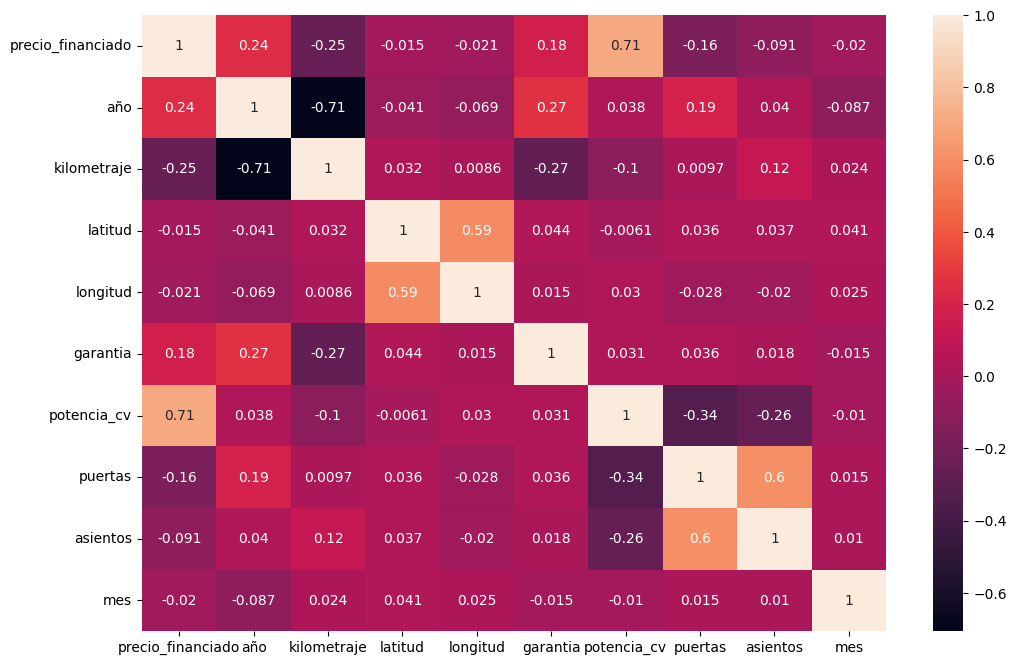

In [83]:
plt.figure(figsize=(12, 8))
sns.heatmap(df._get_numeric_data().iloc[:, 1:].corr(), annot=True)
plt.show()

In [84]:
X = df.drop(columns=['precio_contado'])
y = df['precio_contado']
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['float64', 'int64', 'bool']).columns.tolist()
high_cardinality_cols = ['id_extraccion', 'titulo', 'timestamp_extraccion', 'modelo']  # Add 'modelo' here
for col in high_cardinality_cols:
	if col in categorical_cols:
		categorical_cols.remove(col)
	if col in X.columns:
		X = X.drop(columns=[col])
categorical_cols = [col for col in categorical_cols if col in X.columns]
numeric_cols = [col for col in numeric_cols if col in X.columns]
preprocessor = ColumnTransformer(
	transformers=[
		('num', StandardScaler(), numeric_cols),
		('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
	]
)

X_processed = preprocessor.fit_transform(X)

correlacion = df.corr(numeric_only=True)[['precio_contado']].sort_values('precio_contado', ascending=False)
print(correlacion.head(10))
x_train, x_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


                   precio_contado
precio_contado           1.000000
precio_financiado        0.960488
potencia_cv              0.541649
año                      0.109324
longitud                 0.019618
garantia                 0.016588
mes                     -0.003566
latitud                 -0.022310
kilometraje             -0.190240
puertas                 -0.302454


In [85]:
X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(x_train) 
X_test_scaled = X_scaler.transform(x_test)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))  
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

In [86]:

from sklearn.metrics import mean_absolute_error

def evaluar_modelo(y_real, y_pred, modelo_nombre):
    mae = mean_absolute_error(y_real, y_pred)
    mse = mean_squared_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)
    
    print(f"\n Res {modelo_nombre}:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {np.sqrt(mse):.2f}")
    print(f"R²: {r2:.4f}")
    
    return {'MAE': mae, 'MSE': mse, 'R²': r2}

resultados = {}
modelos = {
    'Random Forest': RandomForestRegressor(n_estimators=50, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

from sklearn.impute import SimpleImputer

# Impute missing values in the scaled data
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

for nombre, modelo in modelos.items():
    modelo.fit(X_train_imputed, y_train_scaled.ravel())
    y_pred_scaled = modelo.predict(X_test_imputed)
    y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
    y_test_original = y_scaler.inverse_transform(y_test_scaled)
    resultados[nombre] = evaluar_modelo(y_test_original, y_pred, nombre)


 Res Random Forest:
MAE: 3221.08
MSE: 2149734772.51
RMSE: 46365.23
R²: 0.5533

 Res Gradient Boosting:
MAE: 6315.77
MSE: 2046976742.19
RMSE: 45243.53
R²: 0.5746

 Res KNN:
MAE: 7455.99
MSE: 2800430524.09
RMSE: 52919.09
R²: 0.4180


In [87]:
model = RandomForestRegressor().fit(x_train, y_train)
importances = model.feature_importances_

feature_names = preprocessor.get_feature_names_out()
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importances = feature_importances.sort_values('Importance', ascending=False)
print("\nImportancia de características ordenadas:")
print("="*40)
print(feature_importances.to_string(index=False)) 
print("="*40)
print("\nOtra presentación:")
for i, row in feature_importances.iterrows():
    print(f"{row['Feature']:20s}: {row['Importance']:.5f}")


Importancia de características ordenadas:
                               Feature   Importance
                      num__potencia_cv 3.791264e-01
                              num__año 1.153205e-01
                      num__kilometraje 9.996493e-02
                     cat__marca_PAGANI 8.567585e-02
                    cat__marca_FERRARI 5.583598e-02
               cat__marca_ASTON MARTIN 4.413654e-02
                num__precio_financiado 2.650321e-02
                    cat__marca_BUGATTI 2.468948e-02
                         num__garantia 1.513324e-02
                              num__mes 1.478893e-02
                cat__marca_LAMBORGHINI 1.353776e-02
     cat__tipo_carroceria_Descapotable 1.347177e-02
                          num__puertas 1.282856e-02
                          num__latitud 1.026949e-02
                cat__marca_ROLLS-ROYCE 9.258940e-03
        cat__tipo_carroceria_Deportivo 8.375078e-03
                    cat__marca_BENTLEY 7.210221e-03
                     

In [88]:
#Comparacion de resultados
resultados_df = pd.DataFrame.from_dict(resultados, orient='index').reset_index()
resultados_df.columns = ['model_name', 'mae', 'mse', 'r2_score']
resultados_df = resultados_df.sort_values('r2_score', ascending=False).reset_index(drop=True)
resultados_df['mae'] = resultados_df['mae'].apply(lambda x: f"{x:.2f}")
resultados_df['mse'] = resultados_df['mse'].apply(lambda x: f"{x:.2f}")
resultados_df['r2_score'] = resultados_df['r2_score'].apply(lambda x: f"{x:.4f}")
resultados_df

,model_name,mae,mse,r2_score
0,Gradient Boosting,6315.77,2046976742.19,0.5746
1,Random Forest,3221.08,2149734772.51,0.5533
2,KNN,7455.99,2800430524.09,0.4180


## Redes Neuronales

In [89]:
#Definimos las características y variables objetivo
x = df.drop(columns=["precio_contado"] )
y= df["precio_contado"]


# Primer Entrenamiento

In [90]:
x_train.shape 

(70739, 181)

In [91]:
# Definir un modelo simple de red neuronal para regresión
model = Sequential([
	Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
	Dropout(0.3),
	Dense(32, activation='relu'),
	Dense(1) 
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
model.summary()

c:\Users\irina\Desktop\HACK A BOSS\Proyecto-\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 128)            │        23,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,457 (107.25 KB)

 Trainable params: 27,457 (107.25 KB)

 Non-trainable params: 0 (0.00 B)

In [151]:
input_dim = x_train.shape[1]
suggested_units = max(32, min(128, int(input_dim * 1.5)))

print(f"Características de entrada: {input_dim}")
print(f"Neuronas sugeridas para primera capa: {suggested_units}")

Características de entrada: 181
Neuronas sugeridas para primera capa: 128


In [154]:
# Construcción del modelo
model = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(x_train.shape[1],)),
    keras.layers.Dropout(0.2), 
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1)
])

# Compilar el modelo
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Entrenamiento
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=32, verbose=1)

Epoch 1/30


c:\Users\irina\Desktop\HACK A BOSS\Proyecto-\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2211/2211 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 6032043008.0000 - mae: 32096.5859 - val_loss: 5803902464.0000 - val_mae: 31492.9219
Epoch 2/30
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 5401968128.0000 - mae: 31444.9219 - val_loss: 5776470528.0000 - val_mae: 31054.5078
Epoch 3/30
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 6208656896.0000 - mae: 31219.2578 - val_loss: 5738109952.0000 - val_mae: 30430.5859
Epoch 4/30
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 5899291136.0000 - mae: 30594.0801 - val_loss: 5690352128.0000 - val_mae: 29635.7012
Epoch 5/30
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 5931948032.0000 - mae: 29875.2227 - val_loss: 5634845184.0000 - val_mae: 28685.9219
Epoch 6/30
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 4835327488.0000 - mae: 28789.0352 - val_loss: 5572010496.0000 - val_mae: 27576.5430
Epoch 7/30
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5488578048.0000 - mae: 27542.0059 - val_loss: 5504621056.0000 - val_mae: 

# Segundo Entrenamiento

In [157]:
#Normalizacion
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [158]:
#Entrenar modelo con datos procesados
model.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs=30, batch_size=32, verbose=1)

Epoch 1/30
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 5172314624.0000 - mae: 21759.5059 - val_loss: 4812110848.0000 - val_mae: 21177.7500
Epoch 2/30
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 4580984320.0000 - mae: 21359.1816 - val_loss: 4812133888.0000 - val_mae: 21220.0215
Epoch 3/30
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 5375079936.0000 - mae: 21640.2852 - val_loss: 4812152832.0000 - val_mae: 21249.0410
Epoch 4/30
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5363773952.0000 - mae: 21621.9922 - val_loss: 4812185600.0000 - val_mae: 21281.9219
Epoch 5/30
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 6465163776.0000 - mae: 21841.5117 - val_loss: 4812195328.0000 - val_mae: 21291.0469
Epoch 6/30
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4759380480.0000 - mae: 21425.1172 - val_loss: 4812209152.0000 - val_mae: 21306.8379
Epoch 7/30
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 6495995392.0000 - mae: 22081.9863 - val_loss: 4812211200.0000 

# Tercer Entrenamiento

In [159]:
#Normalizacion
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [160]:
#Entrenar modelo con datos procesados
model.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs=30, batch_size=32, verbose=1)

Epoch 1/30
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 4029435136.0000 - mae: 21697.7832 - val_loss: 4812280832.0000 - val_mae: 21358.4199
Epoch 2/30
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 5386754560.0000 - mae: 21983.8379 - val_loss: 4812267008.0000 - val_mae: 21351.0059
Epoch 3/30
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 5532020224.0000 - mae: 21736.5371 - val_loss: 4812276224.0000 - val_mae: 21353.1172
Epoch 4/30
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 6381829120.0000 - mae: 21860.8984 - val_loss: 4812264960.0000 - val_mae: 21349.3652
Epoch 5/30
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 4739874304.0000 - mae: 21558.2070 - val_loss: 4812268544.0000 - val_mae: 21350.6328
Epoch 6/30
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 5252441088.0000 - mae: 22208.2578 - val_loss: 4812264448.0000 - val_mae: 21346.9668
Epoch 7/30
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 6102854144.0000 - mae: 21766.9863 - val_loss: 4812264960.0000 

# Último entrenamiento

In [161]:
#sirve para extraer metricas de entrenamiento almacenadas en el objeto history
loss = history.history.get('loss', [])
val_loss = history.history.get('val_loss', [])
mae = history.history.get('mae', [])
val_mae = history.history.get('val_mae', [])
mse = history.history.get('mse', [])
val_mse = history.history.get('val_mse', [])

In [162]:
#crear graficos interactivos para visualizar metricas de entrenamiento de modelos de machine learning
def plot_metrics(epochs, train_metric, val_metric, metric_name, color_train, color_val):
    fig = go.Figure()
    
    # Gráfico de métricas de entrenamiento y validación
    fig.add_trace(go.Scatter(
        x=epochs, y=train_metric, mode='lines+markers', 
        name=f'Train {metric_name}', line=dict(color=color_train))
    )
    fig.add_trace(go.Scatter(
        x=epochs, y=val_metric, mode='lines+markers', 
        name=f'Validation {metric_name}', line=dict(color=color_val))
    )
    
    # Encontrar la mejor época (mínimo val_mae)
    best_epoch = np.argmin(val_metric) + 1  # +1 porque las épocas comienzan en 1
    best_metric_value = val_metric[best_epoch - 1]  # Índice base 0
    
    # Línea vertical y anotación de la mejor época
    fig.add_vline(
        x=best_epoch,
        line=dict(color="gray", dash="dash", width=1),
        annotation_text=f'Mejor época: {best_epoch}',
        annotation_position="top left"
    )
    
    # Personalizar el layout
    fig.update_layout(
        title=f'Evolución del {metric_name} (Mejor época: {best_epoch})',
        xaxis_title='Época',
        yaxis_title=metric_name,
        template='plotly_white',
        hovermode='x unified'
    )
    
    return fig

In [163]:
#verificacion inteligente de metricas  y creación de grafico interactivo
def plot_metrics(history, metric_name):
    """Versión más robusta de la función de graficado"""
    available_metrics = history.history.keys()
    
    # Busca el nombre correcto de la métrica
    possible_names = [metric_name, f'val_{metric_name}', 
                     metric_name.lower(), f'val_{metric_name.lower()}']
    
    actual_name = None
    for name in possible_names:
        if name in available_metrics:
            actual_name = name.replace('val_', '')
            break
    
    if actual_name is None:
        raise ValueError(f"No se encontró la métrica {metric_name}. Métricas disponibles: {available_metrics}")
    
    metric = history.history[actual_name]
    val_metric = history.history[f'val_{actual_name}']
    epochs = list(range(1, len(metric) + 1))
    
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(
        x=epochs, y=metric,
        mode='lines+markers',
        name=f'Entrenamiento {actual_name.upper()}',
        line=dict(color='blue', width=2)
    ))
    
    fig.add_trace(go.Scatter(
        x=epochs, y=val_metric,
        mode='lines+markers',
        name=f'Validación {actual_name.upper()}',
        line=dict(color='red', width=2)
    ))
    
    fig.update_layout(
        title=f'Evolución del {actual_name.upper()}',
        xaxis_title='Épocas',
        yaxis_title=actual_name.upper(),
        template='plotly_white'
    )
   
    
    return fig

El gráfico muestra la evolución del error Absoluto Medio (MAE) durante el entrenamiento de un modelo de Machine Learning.

In [164]:
#mae
fig_mae = plot_metrics(history, 'mae')
fig_mae.show()

Grafico de perdidas en el train LOSS

In [165]:
# Extracción de métricas (como ya lo tienes)
loss = history.history.get('loss', [])
val_loss = history.history.get('val_loss', [])
mse = history.history.get('mse', [])
val_mse = history.history.get('val_mse', [])
epochs = list(range(1, len(loss) + 1))

# Función mejorada para graficar (versión más robusta)
def plot_training_metrics(history, metrics=['loss', 'mse']):
    """Visualiza múltiples métricas de entrenamiento"""
    figures = []
    
    for metric_name in metrics:
        # Manejo flexible de nombres de métricas
        possible_names = [metric_name, f'val_{metric_name}', 
                         metric_name.lower(), f'val_{metric_name.lower()}']
        
        # Buscar la métrica en el historial
        actual_name = None
        for name in possible_names:
            if name in history.history:
                actual_name = name.replace('val_', '')
                break
        
        
            
        # Obtener datos
        train_metric = history.history[actual_name]
        val_metric = history.history[f'val_{actual_name}']
        epochs = list(range(1, len(train_metric) + 1))
        
        # Crear figura
        fig = go.Figure()
        
        # Añadir trazas
        fig.add_trace(go.Scatter(
            x=epochs, y=train_metric,
            mode='lines+markers',
            name=f'Train {actual_name.upper()}',
            line=dict(color='blue', width=2)
        ))
        
        fig.add_trace(go.Scatter(
            x=epochs, y=val_metric,
            mode='lines+markers',
            name=f'Validation {actual_name.upper()}',
            line=dict(color='red', width=2)
        ))
        
        # Encontrar y marcar la mejor época
        best_epoch = np.argmin(val_metric) + 1
        best_value = val_metric[best_epoch-1]
        
        fig.add_vline(
            x=best_epoch,
            line=dict(color="green", dash="dash", width=1),
            annotation_text=f'Mejor época: {best_epoch}',
            annotation_position="top right"
        )
        fig.update_layout(
        yaxis=dict(range=[min(min(train_metric), min(val_metric)) * 0.9, 
               max(max(train_metric), max(val_metric)) * 1.1]),
        legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)
        
        figures.append(fig)
    
    return figures

# Uso: Visualizar MSE y Loss
figures = plot_training_metrics(history, metrics=['loss'])

# Mostrar figuras
for fig in figures:
    fig.show()

In [166]:
def plot_validation_metrics(history):
    # Verificar que las métricas existan
    if not all(metric in history.history for metric in ['val_loss', 'val_mae']):
        raise ValueError("Faltan métricas en el historial. Asegúrate de incluir 'loss' y 'mae' en model.compile()")

    epochs = list(range(1, len(history.history['val_loss']) + 1))
    val_loss = history.history['val_loss']
    val_mae = history.history['val_mae']
   
    fig = make_subplots(rows=2, cols=1, 
                       subplot_titles=('Validation Loss', 'Validation MAE'),
                       vertical_spacing=0.15)
    fig.add_trace(
        go.Scatter(x=epochs, y=val_loss, 
                  mode='lines+markers',
                  name='Validation Loss',
                  line=dict(color='#FF7F0E', width=3),
                  marker=dict(size=8)),
        row=1, col=1
    )
    # Gráfico de Validation MAE
    fig.add_trace(
        go.Scatter(x=epochs, y=val_mae,
                  mode='lines+markers',
                  name='Validation MAE',
                  line=dict(color='#1F77B4', width=3),
                  marker=dict(size=8)),
        row=2, col=1
    )
    
    # Encontrar y marcar las mejores épocas
    best_loss_epoch = np.argmin(val_loss) + 1
    best_mae_epoch = np.argmin(val_mae) + 1
    fig.add_vline(x=best_loss_epoch, line=dict(color='#FF7F0E', dash='dash'),
                 row=1, col=1)
    fig.add_vline(x=best_mae_epoch, line=dict(color='#1F77B4', dash='dash'),
                 row=2, col=1)
    fig.update_layout(
        height=800,
        width=1000,
        title_text='<b>Métricas de Validación durante el Entrenamiento</b>',
        title_font_size=20,
        title_x=0.5,
        hovermode='x unified',
        template='plotly_white',
        showlegend=False,
        margin=dict(t=100, b=80)
    )
    
    fig.update_xaxes(title_text='Épocas', row=2, col=1)
    fig.update_yaxes(title_text='Loss', row=1, col=1)
    fig.update_yaxes(title_text='MAE', row=2, col=1)
    fig.add_annotation(
        x=best_loss_epoch, y=max(val_loss),
        text=f'Mejor Loss: {min(val_loss):.2f}',
        showarrow=True,
        arrowhead=1,
        ax=0,
        ay=-40,
        row=1,
        col=1
    )
    
    fig.add_annotation(
        x=best_mae_epoch, y=max(val_mae),
        text=f'Mejor MAE: {min(val_mae):.2f}',
        showarrow=True,
        arrowhead=1,
        ax=0,
        ay=-40,
        row=2,
        col=1
    )
    return fig
fig = plot_validation_metrics(history)
fig.show()

In [148]:
import tensorflow as tf

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Probablemente necesites reducir el LR
             loss='mae')

In [150]:
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))  # Regularización L2
model.add(Dropout(0.3))